In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Import danych i zmiana nazwy na bardziej przyjazne

Dane zawierają zestaw trenigowy, testowy i zestaw prawdziwych odpowiedzi dla zestawu testowego. Każdy zestaw danych jest podzielony na poszczególne silniki i dalej na poszczególne cykle pracy. Do każdego cyklu pracy dane są ustwienia silnika i odczyty z czujników.

W zestawie treningowym ostatni cykl dla każdego silnika oznacza moment w którym dany silnik uległ całkowitemu zużyciu.

W zestawie testowym ostatni cykl jest nadal cyklem prawidłowej pracy i celem zadania jest określenie ile cykli pozostało do całkowitego zużycia silnika. 

In [2]:
data_folder_name='Data'
file_names=os.listdir('Data')

In [3]:
print(file_names)

['RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']


In [4]:
df_train=pd.read_csv('Data/train_FD001.txt',sep=' ',header=None)
df_real_test=pd.read_csv('Data/test_FD001.txt',sep=' ',header=None)
y_RUL=pd.read_csv('Data/RUL_FD001.txt',sep=' ',header=None)

In [5]:
index_names = ['Engine', 'Cycle']
setting_names = ['Setting 1', 'Setting 2', 'Setting 3']
sensor_names=[ 
"(Fan Inlet Temperature) (◦R)",
"(LPC Outlet Temperature) (◦R)",
"(HPC Outlet Temperature) (◦R)",
"(LPT Outlet Temperature) (◦R)",
"(Fan Inlet Pressure) (psia)",
"(Bypass-Duct Pressure) (psia)",
"(HPC Outlet Pressure) (psia)",
"(Physical Fan Speed) (rpm)",
"(Physical Core Speed) (rpm)",
"(Engine Pressure Ratio(P50/P2)",
"(HPC Outlet Static Pressure) (psia)",
"(Ratio of Fuel Flow to Ps30) (pps/psia)",
"(Corrected Fan Speed) (rpm)",
"(Corrected Core Speed) (rpm)",
"(Bypass Ratio) ",
"(Burner Fuel-Air Ratio)",
"(Bleed Enthalpy)",
"(Demanded Fan Speed) (rpm)",
"(Demanded Corrected Fan Speed) (rpm)",
"(HPT Coolant Bleed) (lbm/s)",
"(Low-Pressure Turbines Cool Air Flow) (lbm/s)",
"Sensor 26",
"Sensor 27"]
col_names = index_names + setting_names + sensor_names

In [6]:
df_train.columns=col_names
df_train.drop(columns=['Sensor 26','Sensor 27'],inplace=True)

df_real_test.columns=col_names
df_real_test.drop(columns=['Sensor 26','Sensor 27'],inplace=True)

y_RUL.drop(columns=[1],inplace=True)
y_RUL.columns=['RUL']

In [7]:
df_train.head()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),...,(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Demanded Fan Speed) (rpm),(Demanded Corrected Fan Speed) (rpm),(HPT Coolant Bleed) (lbm/s),(Low-Pressure Turbines Cool Air Flow) (lbm/s)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
df_real_test.head()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),...,(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Demanded Fan Speed) (rpm),(Demanded Corrected Fan Speed) (rpm),(HPT Coolant Bleed) (lbm/s),(Low-Pressure Turbines Cool Air Flow) (lbm/s)
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [9]:
y_RUL.head()

,RUL
0,112
1,98
2,69
3,82
4,91


#### Wstępny przegląd danych

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Engine                                         20631 non-null  int64  
 1   Cycle                                          20631 non-null  int64  
 2   Setting 1                                      20631 non-null  float64
 3   Setting 2                                      20631 non-null  float64
 4   Setting 3                                      20631 non-null  float64
 5   (Fan Inlet Temperature) (◦R)                   20631 non-null  float64
 6   (LPC Outlet Temperature) (◦R)                  20631 non-null  float64
 7   (HPC Outlet Temperature) (◦R)                  20631 non-null  float64
 8   (LPT Outlet Temperature) (◦R)                  20631 non-null  float64
 9   (Fan Inlet Pressure) (psia)                    206

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
Cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
Setting 1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
Setting 2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
Setting 3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
(Fan Inlet Temperature) (◦R),20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
(LPC Outlet Temperature) (◦R),20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
(HPC Outlet Temperature) (◦R),20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
(LPT Outlet Temperature) (◦R),20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
(Fan Inlet Pressure) (psia),20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [12]:
print(f"None values in test, and y data sets: {df_real_test.isna().sum().sum()}, {y_RUL.isna().sum().sum()}")

None values in test, and y data sets: 0, 0


Widać, że wszystkie zestawy danych nie zawierają żadnych nieokreślonych wartości. Niektóre czujniki mają stałe wartości.

#### Usunięcie kolumn ze stałymi wartościami

In [13]:
df_train_backup=df_train

In [14]:
constant_columns=[]
for column in df_train.columns:
    if df_train[column].max()==df_train[column].min():
        constant_columns.append(column)

print(constant_columns)

['Setting 3', '(Fan Inlet Temperature) (◦R)', '(Fan Inlet Pressure) (psia)', '(Engine Pressure Ratio(P50/P2)', '(Burner Fuel-Air Ratio)', '(Demanded Fan Speed) (rpm)', '(Demanded Corrected Fan Speed) (rpm)']


In [15]:
df_train.drop(columns=constant_columns, inplace=True)

In [16]:
df_train.head()

,Engine,Cycle,Setting 1,Setting 2,(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(HPT Coolant Bleed) (lbm/s),(Low-Pressure Turbines Cool Air Flow) (lbm/s)
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


#### Korelacje

In [17]:
df_corr=df_train.corr().abs()

In [18]:
df_corr.head()

,Engine,Cycle,Setting 1,Setting 2,(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(HPT Coolant Bleed) (lbm/s),(Low-Pressure Turbines Cool Air Flow) (lbm/s)
Engine,1.000000,0.078753,0.017895,0.006197,0.014133,0.012621,0.026116,0.026431,0.032073,0.039929,0.052053,0.024707,0.031882,0.044230,0.059473,0.022486,0.013513,0.020589,0.016465
Cycle,0.078753,1.000000,0.004527,0.016132,0.549898,0.543947,0.624577,0.105980,0.595914,0.475977,0.443999,0.634385,0.611354,0.477523,0.370324,0.588676,0.566995,0.583597,0.585923
Setting 1,0.017895,0.004527,1.000000,0.011660,0.009030,0.005651,0.009544,0.001340,0.009437,0.000427,0.004279,0.011658,0.001491,0.002318,0.004469,0.007652,0.002599,0.005713,0.014559
Setting 2,0.006197,0.016132,0.011660,1.000000,0.007266,0.009068,0.014673,0.014355,0.016678,0.013285,0.005425,0.011690,0.010923,0.018156,0.006310,0.014156,0.012280,0.010554,0.007846
(LPC Outlet Temperature) (◦R),0.014133,0.549898,0.009030,0.007266,1.000000,0.602610,0.714949,0.132242,0.702136,0.662325,0.273764,0.740020,0.724578,0.661792,0.179752,0.675975,0.629886,0.661841,0.668050


In [19]:
threshold=0.9
mask=df_corr.where(df_corr>=threshold).isna()

In [20]:
mask

,Engine,Cycle,Setting 1,Setting 2,(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(HPT Coolant Bleed) (lbm/s),(Low-Pressure Turbines Cool Air Flow) (lbm/s)
Engine,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Cycle,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Setting 1,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Setting 2,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
(LPC Outlet Temperature) (◦R),True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
(HPC Outlet Temperature) (◦R),True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
(LPT Outlet Temperature) (◦R),True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
(Bypass-Duct Pressure) (psia),True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
(HPC Outlet Pressure) (psia),True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
(Physical Fan Speed) (rpm),True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


In [21]:
sns.set_style("whitegrid")

<AxesSubplot: >

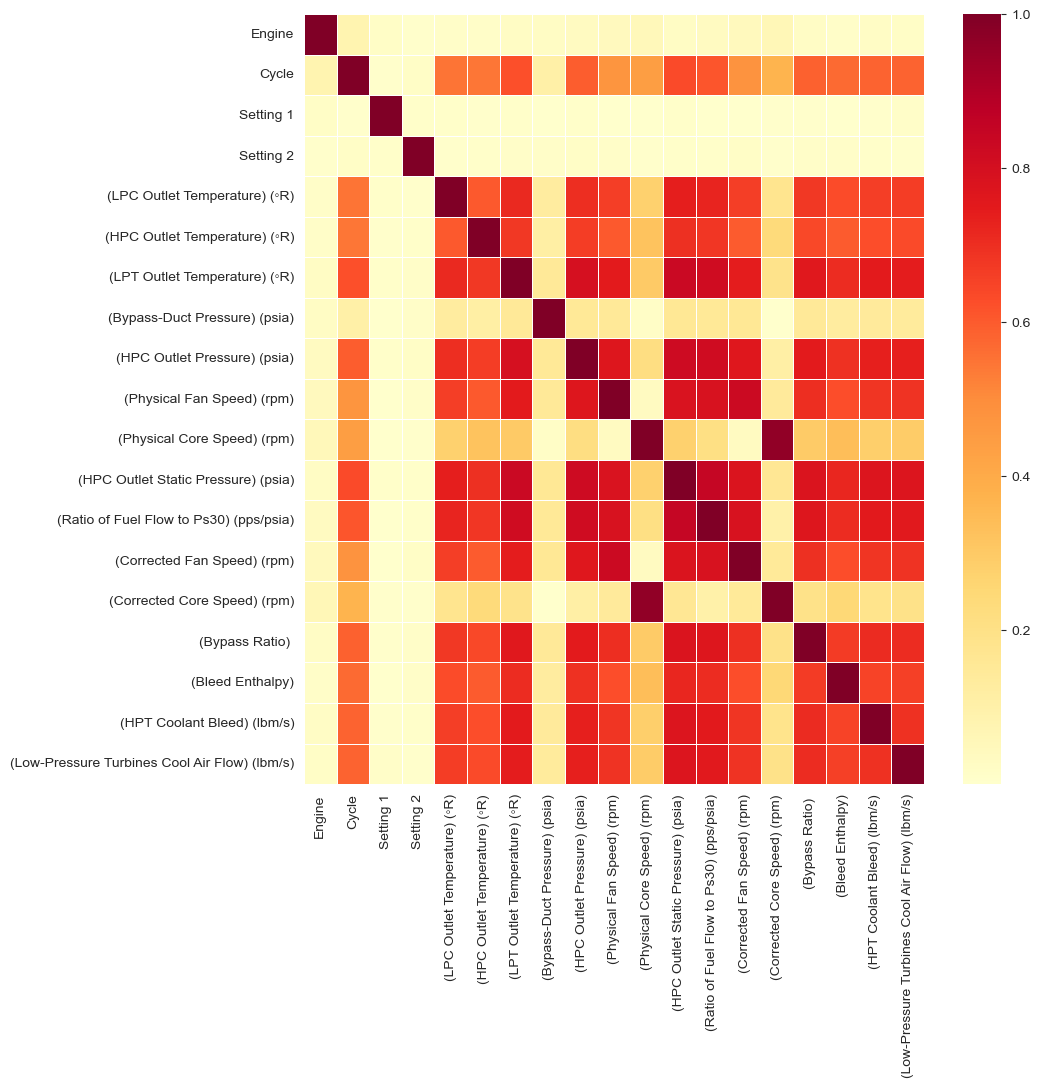

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, cmap="YlOrRd", linewidths=0.6, linecolor='White')

<AxesSubplot: >

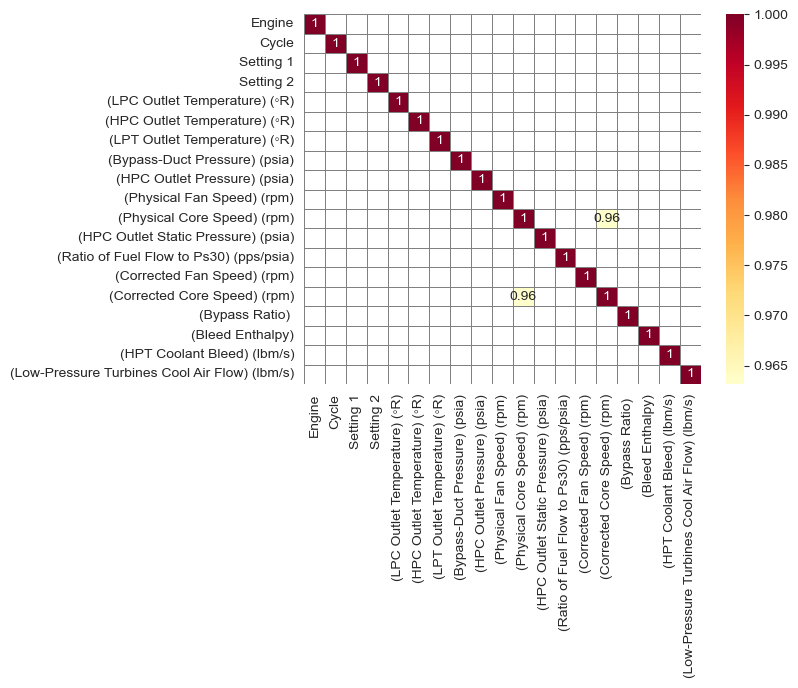

In [23]:
#plt.figure(figsize=(10,10))
sns.heatmap(df_corr, cmap="YlOrRd", linewidths=0.6, linecolor='Gray', annot=True, mask=mask)

In [24]:
upper_triangle = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

high_corr_columns=[]
for column in upper_triangle.columns:
    if upper_triangle[column].max()>threshold:
        high_corr_columns.append(column)
        
print(high_corr_columns)

['(Corrected Core Speed) (rpm)']


In [25]:
df_train.drop(columns=high_corr_columns, inplace=True)

#### Pozostałe kolumny

In [26]:
df_train.columns

Index(['Engine', 'Cycle', 'Setting 1', 'Setting 2',
       '(LPC Outlet Temperature) (◦R)', '(HPC Outlet Temperature) (◦R)',
       '(LPT Outlet Temperature) (◦R)', '(Bypass-Duct Pressure) (psia)',
       '(HPC Outlet Pressure) (psia)', '(Physical Fan Speed) (rpm)',
       '(Physical Core Speed) (rpm)', '(HPC Outlet Static Pressure) (psia)',
       '(Ratio of Fuel Flow to Ps30) (pps/psia)',
       '(Corrected Fan Speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)',
       '(HPT Coolant Bleed) (lbm/s)',
       '(Low-Pressure Turbines Cool Air Flow) (lbm/s)'],
      dtype='object')

#### Utworzenie kolumy z całkowitym czasem życia silnika i kolumny z pozostałym czasem życia silnika

In [27]:
df_train_backup2=df_train

In [28]:
Life=df_train.groupby('Engine')['Cycle'].max()

In [29]:
Life.describe()

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: Cycle, dtype: float64

In [30]:
df_train=df_train.merge(Life, how='left', on='Engine')

df_train.rename(columns={"Cycle_y":"Life","Cycle_x":'Cycle'},inplace=True)

In [31]:
df_train.head()

,Engine,Cycle,Setting 1,Setting 2,(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(HPT Coolant Bleed) (lbm/s),(Low-Pressure Turbines Cool Air Flow) (lbm/s),Life
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,192


In [32]:
df_train['RUL']=df_train['Life']-df_train['Cycle']

In [33]:
df_train.iloc[185:195]

,Engine,Cycle,Setting 1,Setting 2,(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(HPT Coolant Bleed) (lbm/s),(Low-Pressure Turbines Cool Air Flow) (lbm/s),Life,RUL
185,1,186,0.0027,-0.0003,643.51,1595.16,1426.30,21.61,552.57,2388.21,9051.37,48.12,520.08,2388.25,8.5227,397,38.47,23.0564,192,6
186,1,187,-0.0047,-0.0000,643.32,1592.10,1427.27,21.61,551.08,2388.29,9037.71,48.23,519.53,2388.28,8.5218,396,38.42,23.0822,192,5
187,1,188,-0.0067,0.0003,643.75,1602.38,1422.78,21.61,551.94,2388.31,9037.91,48.00,519.79,2388.23,8.5207,396,38.51,22.9588,192,4
188,1,189,-0.0006,0.0002,644.18,1596.17,1428.01,21.61,550.70,2388.27,9044.55,48.08,519.58,2388.33,8.5183,395,38.48,23.1127,192,3
189,1,190,-0.0027,0.0001,643.64,1599.22,1425.95,21.61,551.29,2388.29,9040.58,48.33,520.04,2388.35,8.5223,398,38.49,23.0675,192,2
190,1,191,-0.0000,-0.0004,643.34,1602.36,1425.77,21.61,550.92,2388.28,9042.76,48.15,519.57,2388.30,8.5174,394,38.45,23.1295,192,1
191,1,192,0.0009,-0.0000,643.54,1601.41,1427.20,21.61,551.25,2388.32,9033.22,48.25,520.08,2388.32,8.5113,396,38.48,22.9649,192,0
192,2,1,-0.0018,0.0006,641.89,1583.84,1391.28,21.60,554.53,2388.01,9054.72,46.93,522.33,2388.06,8.3905,391,38.94,23.4585,287,286
193,2,2,0.0043,-0.0003,641.82,1587.05,1393.13,21.61,554.77,2387.98,9051.31,47.24,522.70,2387.98,8.4167,392,39.06,23.4085,287,285
194,2,3,0.0018,0.0003,641.55,1588.32,1398.96,21.60,555.14,2388.04,9054.24,47.22,522.58,2387.99,8.3802,391,39.11,23.4250,287,284


#### Wykresy z czujników

In [34]:
engines=df_train['Engine'].unique()
sensors=df_train.columns[2:-2]

fig, ax=plt.subplots(nrows=len(df_train.columns[2:-2]), ncols=1, figsize=(10,60), sharex=True)
ax[0].invert_xaxis()


sensor=sensors[3]
for i, sensor in enumerate(sensors):
    for engine in engines[::10]:
        df_plot=df_train[df_train['Engine']==engine][[sensor,'RUL']]
        
        sensor_plot=sns.lineplot(data=df_plot, x=df_plot['RUL'], y=df_plot[sensor], linewidth=0.1, color='blue', ax=ax[i])
    

### rozdzielanie danych

In [35]:
from sklearn.model_selection import train_test_split

In [64]:
X=df_train[df_train.columns[0:-2]]
Y=df_train["RUL"]

In [65]:
for i, column_name in enumerate(X.columns): #Fix spaces and signs in column names
    column_name=f"sensor_{i}"

In [66]:
nice_names=['Engine','Cycle']
for i, column in enumerate(X.columns[2:]):
    nice_names.append(f'Sensor_{i+1}')

In [67]:
X.columns=nice_names

In [68]:
X

,Engine,Cycle,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640


In [69]:
train_x, val_x, train_y, val_y=train_test_split(X, Y, random_state=0)

In [70]:
train_y.head()

5449      15
19357    194
3429     151
11153    101
18342     37
Name: RUL, dtype: int64

## Funkcje oceniające

In [77]:
from sklearn.metrics import accuracy_score

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [73]:
lr.fit(train_x, train_y)

LinearRegression()

In [74]:
pred_y=lr.predict(val_x)

In [82]:
lr.score(val_x, val_y)

0.6686852485110322